In [4]:
import torch
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
print(torch.cuda.is_available())

1.8.1+cu101
True


## 读取数据集

In [5]:
data = pd.read_csv("../小型CSV数据/Income1.csv")
# 将numpy数据类型转换为tensor：torch.from_numpy()
X = torch.from_numpy(data.Education.values.reshape(-1, 1).astype(np.float32))
Y = torch.from_numpy(data.Income.values.reshape(-1, 1).astype(np.float32))

## 分解写法，自己实现线性回归，不调用torch定义好的nn.Linear()模型

In [6]:
w = torch.randn(size=(1,), requires_grad=True) # size=1是因为这是一元单变量的线性回归
b = torch.zeros(size=(1,), requires_grad=True)
learning_rate = 0.0001

In [7]:
w.grad # 首次的梯度为None

In [8]:
for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = torch.matmul(x, w) + b # torch.matmul是矩阵乘法
        loss = (y - y_pred).pow(2).mean()
        if w.grad:
            # 当本次梯度计算完毕之后需要更新参数w的时候，需要将上一次w的梯度置为0
            # 否则会造成本次w的梯度与上次的梯度的累加，造成更新出错
            # 这里通过w.grad来判断w是不是首次更新，如果是首次更新则不进入if语句，因此首次w的梯度为None
            # 通过带有下划线的zero_()置空函数是为了直接在原地对w上次的梯度进行置空
            w.grad.data.zero_()
        if b.grad:
            b.grad.data.zero_()
        loss.backward()
        # 这一步是优化模型的参数，并不需要跟踪，所以不涉及到梯度计算
        with torch.no_grad(): # 这一步不需要进行跟踪，因此不涉及到梯度的计算，所以在这一步requires_grad=FALSE
            w.data -= w.grad.data * learning_rate
            b.data -= b.grad.data * learning_rate

In [9]:
w

tensor([4.9732], requires_grad=True)

In [10]:
b

tensor([-28.3453], requires_grad=True)

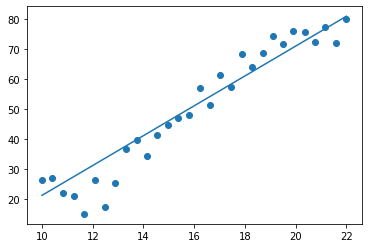

In [11]:
# 这里data属性是因为(X*w + b)这里面三个量都是requires_grad=True的
plt.plot(X.numpy(), (X*w + b).data.numpy()) 
plt.scatter(data.Education, data.Income)